In [210]:
pip install librosa soundfile numpy sklearn pyaudio

Note: you may need to restart the kernel to use updated packages.


In [211]:
!pip install soundfile

In [212]:
import numpy as np 
import pandas as pd 
import os

In [213]:

def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [214]:
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

In [215]:
x, sr = librosa.load('D:/Virtual Internships/CodeClause/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav')
sf.write('stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')
Audio(data=x, rate=sr)

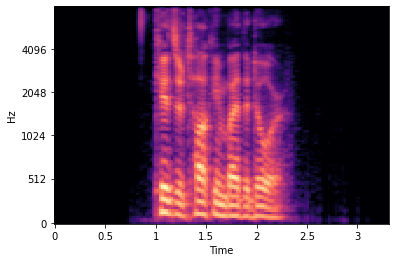

In [216]:
spectrogram=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');

In [217]:

def zero_crossing(x):
    zero_crossings=[]
    silence_removed=[]
    silence_removed=np.array(silence_removed)
    for i  in range(1,len(x)):
        
        if(x[i-1]<=0 and x[i]>0):
            zero_crossings.append(1)
        else:
            zero_crossings.append(0)
    for i in range(len(zero_crossings)-3):
        zeros=np.sum(zero_crossings[4*i:4*(i+1)])
        
        zeros=4-zeros
        if(zeros>2):
            silence_removed=np.concatenate((silence_removed,np.array(x[4*i:4*(i+1)])))
    print("Before Silence Removal : ",len(x),"\nAfter Silence Removal : ",len(silence_removed))
    return silence_removed

In [218]:
silence_removed=zero_crossing(x)

Before Silence Removal :  72839 
After Silence Removal :  64443


In [219]:
Audio(data=x, rate=sr)

In [220]:
Audio(data=silence_removed, rate=sr)

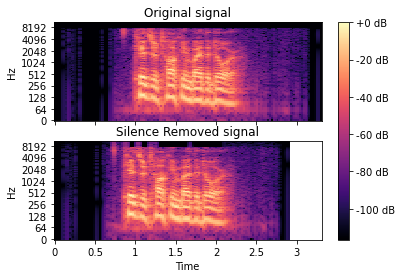

In [221]:
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(silence_removed)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Silence Removed signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

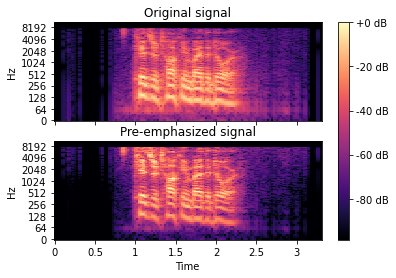

In [222]:

y_filt = librosa.effects.preemphasis(x)

S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

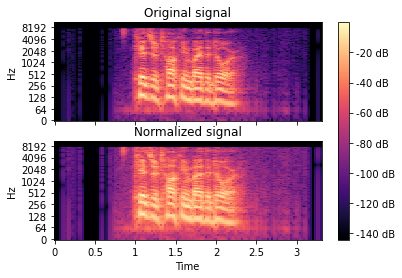

In [223]:

x_norm=x/max(x)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_norm)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Normalized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [224]:
def preprocessing(file):
    X,sample_rate = librosa.load(file)
    
    y_filt = librosa.effects.preemphasis(X)
    
    return y_filt,sample_rate

In [225]:

emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}


In [226]:
def feature_extraction(X,sample_rate):
    result = np.array([])
    
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))
    
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result=np.hstack((result, mel))
    
    return result

In [227]:
from glob import glob
files_audio = glob('D:/Virtual Internships/CodeClause/speech-emotion-recognition-ravdess-data'+'/*/*.wav')

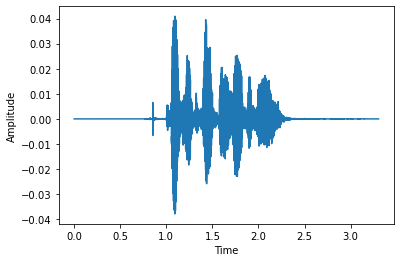

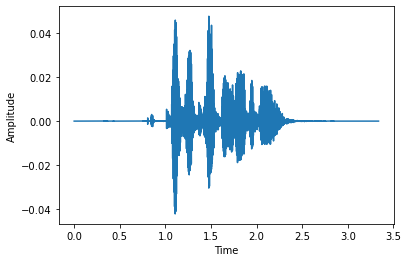

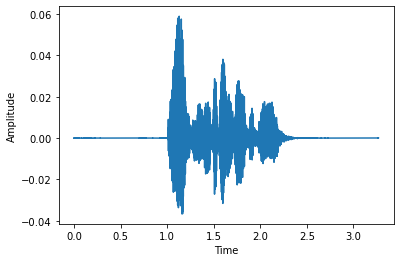

In [228]:
import matplotlib.pyplot as plt

for i in range(3):
    audio,sfreq = librosa.load(files_audio[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [229]:
x,y=[],[]

emotions=['happy','sad','angry','fearful','disgust']

from IPython.display import clear_output
e = set()

for file in os.listdir("D:\Virtual Internships\CodeClause\speech-emotion-recognition-ravdess-data\Actor_01"):
    if file.endswith(".wav"):
        file_path = os.path.join("D:\Virtual Internships\CodeClause\speech-emotion-recognition-ravdess-data\Actor_01", file)
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotions_all[file_name.split("-")[2]]
        if emotion not in emotions:
            continue
        e.add(file.split('/')[-1])
        
        pre_speech=preprocessing(file_path)
        
        feature=feature_extraction(pre_speech[0],pre_speech[1])
        x.append(feature)
        y.append(emotion)


In [230]:
x = np.array(x)

<BarContainer object of 5 artists>

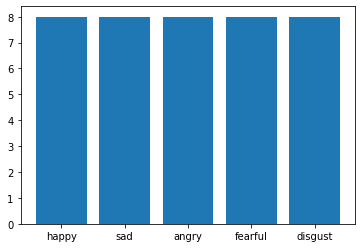

In [231]:
from collections import Counter
target_count=pd.Series(Counter(y))
plt.bar(target_count.index,target_count)

In [232]:
x.shape

(40, 160)

In [233]:
len(y)

40

In [234]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [235]:
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)

In [236]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4,shuffle=True,stratify=y)

In [237]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [259]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model=XGBClassifier()

model.fit(x_train,y_train)

y_pred1=model.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.5


In [260]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [261]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 1.60948	valid_0's multi_logloss: 1.66728
[40]	training's multi_logloss: 1.60948	valid_0's multi_logloss: 1.66728
[60]	training's multi_logloss: 1.60948	valid_0's multi_logloss: 1.66728
[80]	training's multi_logloss: 1.60948	valid_0's multi_logloss: 1.66728
[100]	training's multi_logloss: 1.60948	valid_0's multi_logloss: 1.66728


C:\Users\cinep\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [262]:
y_pred2=model.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.125


In [263]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(x_train,y_train)
y_pred3=clf.predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.375


In [264]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,100), learning_rate='adaptive', max_iter=1000)
model.fit(x_train,y_train)
y_pred4=model.predict(x_test)
print(accuracy_score(y_test,y_pred4))

C:\Users\cinep\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


1.0


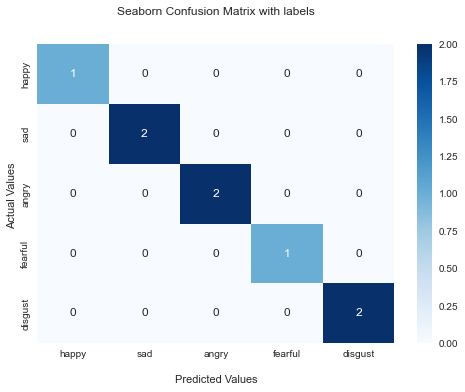

In [265]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred4, labels=[0,1,2,3,4])
import seaborn as sns

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])
ax.yaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])

plt.show()

In [266]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


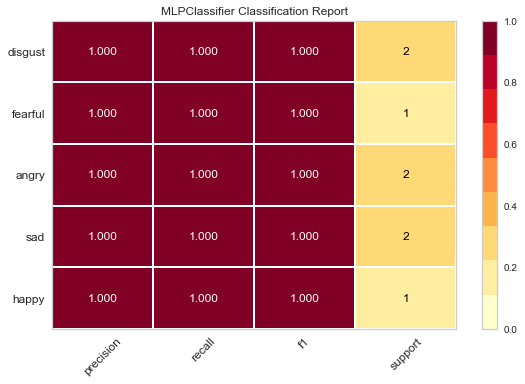

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [267]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, classes=['happy','sad','angry','fearful','disgust'], support=True)

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show() 


In [268]:
emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}

In [269]:
test_audio, sr = librosa.load('D:/Virtual Internships/CodeClause/speech-emotion-recognition-ravdess-data/Actor_04/03-01-04-01-02-02-04.wav')
Audio(data=test_audio, rate=sr)

In [270]:
emotion=emotions_all['03-01-04-01-02-02-04'.split("-")[2]]

# Actual Emotion

In [271]:
emotion

'sad'

In [272]:
x=[]
y=[]
pre_speech=preprocessing('D:/Virtual Internships/CodeClause/speech-emotion-recognition-ravdess-data/Actor_04/03-01-04-01-02-02-04.wav')
feature=feature_extraction(pre_speech[0],pre_speech[1])
x.append(feature)
y.append(emotion)

In [273]:
pred=model.predict(x)

# Predicted Emotion

In [274]:
label_encoder.inverse_transform(pred)

array(['happy'], dtype='<U7')

correct Label!